In [132]:
import pandas as pd

In [133]:
df = pd.read_excel('voting.xlsx')#Подібних датасетів я знайти не зміг, тому цей файл створив сам
df.head()

,Movie_names,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12,user13,user14,user15
0,Titanic,5,2,0,3,1,1,3,3,0,2,4,4,5,1,1
1,Jumanji,3,1,2,3,1,3,4,0,3,3,0,4,0,2,3
2,Forest Gump,4,2,5,0,3,2,5,5,3,4,2,4,4,3,4
3,500 Days of Summer,5,0,4,4,2,4,4,0,2,0,3,0,0,4,5
4,White Noise,4,0,5,5,4,5,4,0,3,1,0,5,0,5,4


In [134]:
df.keys()

Index(['Movie_names', 'user1', 'user2', 'user3', 'user4', 'user5', 'user6',
       'user7', 'user8', 'user9', 'user10', 'user11', 'user12', 'user13',
       'user14', 'user15'],
      dtype='object')

In [135]:
df_movie_names = df['Movie_names']
df.drop(columns=['Movie_names'], axis=1, inplace=True)
df

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12,user13,user14,user15
0,5,2,0,3,1,1,3,3,0,2,4,4,5,1,1
1,3,1,2,3,1,3,4,0,3,3,0,4,0,2,3
2,4,2,5,0,3,2,5,5,3,4,2,4,4,3,4
3,5,0,4,4,2,4,4,0,2,0,3,0,0,4,5
4,4,0,5,5,4,5,4,0,3,1,0,5,0,5,4
5,1,0,0,2,5,3,4,0,5,2,1,2,2,1,4
6,2,0,5,0,3,3,3,5,2,4,4,3,3,3,3
7,3,1,5,0,2,4,5,3,0,5,5,1,1,2,4
8,4,5,5,5,0,5,4,4,5,3,3,4,0,0,3


In [136]:
import numpy as np
Y=df
R=df.applymap(lambda x: 0 if x==0 else 1)
Y

,user1,user2,user3,user4,user5,user6,user7,user8,user9,user10,user11,user12,user13,user14,user15
0,5,2,0,3,1,1,3,3,0,2,4,4,5,1,1
1,3,1,2,3,1,3,4,0,3,3,0,4,0,2,3
2,4,2,5,0,3,2,5,5,3,4,2,4,4,3,4
3,5,0,4,4,2,4,4,0,2,0,3,0,0,4,5
4,4,0,5,5,4,5,4,0,3,1,0,5,0,5,4
5,1,0,0,2,5,3,4,0,5,2,1,2,2,1,4
6,2,0,5,0,3,3,3,5,2,4,4,3,3,3,3
7,3,1,5,0,2,4,5,3,0,5,5,1,1,2,4
8,4,5,5,5,0,5,4,4,5,3,3,4,0,0,3


In [137]:
def J (Y, R, X,Theta, lambd): 
    '''
    params: 1d vector  of X and Theta 
    :return expression for cost function 
    '''
    
    assert(X.shape[1]==Theta.shape[0])
    h= X @ Theta 


    try: 
        assert(h.shape ==Y.shape)
    except:
        print ('h.shape {} !=Y.shape {}'.format(h.shape, Y.shape) )

       
    J= 1/2 * np.sum(((h-Y)*R) **2) + lambd/2 * np.sum(X**2) + lambd/2 * np.sum(Theta**2)

    try: 
        assert(len(J.shape)== 0)
    except:
        print ('J is not raw number. J.shape = ', J.shape)
    
    return J
def J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd): 
   
    cost_matr= (X @ Theta - Y) * R #  n_movies * n_users 

    X_grad= cost_matr @ Theta.T 
    Theta_grad= (cost_matr.T @ X).T
    
   
    try: 
        assert(X_grad.shape ==X.shape)
        assert(Theta_grad.shape ==Theta.shape)
    except:
        print ('Check gradient calculus')

    # Regularization part :          
    X_grad  += lambd * X
    Theta_grad += lambd * Theta

    
    return X_grad, Theta_grad
def fit(Y,R, num_features= 10,  alpha=0.0001, lambd= .01, eps= .1,  max_iter=1000,step=100, verbose=0):    
    num_movies,num_users =Y.shape
    
    
    if verbose: 
        print ('Running gradient descent with alpha= {}, lambda= {}, eps= {}, max_iter= {}'.format(
            alpha, lambd, eps, max_iter))
        

    #     X= params[:num_movies*num_features].reshape(num_movies,num_features)
    #     Theta = params[num_movies*num_features:].reshape(num_features,num_users)

    np.random.seed(2019)
    X = np.random.randn(num_movies, num_features)
    Theta = np.random.randn( num_features, num_users)
    
    J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
    continue_iter = True # flag to continue next iter (grad desc step)
    iter_number =0 # used for limit by max_iter

    while continue_iter:            
        # Do step of gradient descent    
        X_grad, Theta_grad =  J_derivative(Y,R,X, Theta, num_movies, num_users, num_features, lambd)
        X= X- alpha  *X_grad        
        Theta= Theta- alpha  *Theta_grad

        # keep history of J values
        J_hist.append(J(Y, R, X,Theta, lambd))
        # check criteria of exit (finish grad desc)
        if iter_number> max_iter: # if limit succeeded
            continue_iter = False
            print ('iter_number> max_iter')
        elif np.abs(J_hist[iter_number-1] - J_hist[iter_number])< eps: # if accuracy is succeeded
            continue_iter = False
            print ('J_hist[iter_number]={}'.format(J_hist[iter_number]))
        iter_number += 1
        
        if verbose and iter_number%step ==0:
            print ('{}: {}'.format(iter_number, J_hist[iter_number-1]))
    
    return X,Theta, J_hist


import matplotlib.pyplot as plt
def draw_cost_changes(J_hist):
    J_hist=J_hist[1:]
    plt.figure()
    plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 563.4800646643282
100: 298.1833417904052
150: 227.1270907481897
200: 199.40598445667686
250: 184.19746140358575
300: 173.753703090478
350: 165.5716329738362
400: 158.66900251162548
450: 152.5965897917671
500: 147.1212870406247
550: 142.1088473732394
600: 137.47504402401552
650: 133.16317676691128
700: 129.13279436929253
750: 125.3536145861178
800: 121.80203403057267
850: 118.45901394058693
900: 115.30874043159012
950: 112.33774391518999
1000: 109.53430327048434
1050: 106.88803331712728
1100: 104.38959383038812
1150: 102.03048100492406
1200: 99.80287582659167
1250: 97.6995322529029
1300: 95.71369354257303
1350: 93.83902867536307
1400: 92.06958323525245
1450: 90.39974079660709
1500: 88.82419200734645
1550: 87.33790936881338
1600: 85.93612627770855
1650: 84.61431929447645
1700: 83.36819288521386
1750: 82.1936660852836
1800: 81.08686067655401
1850: 80.04409057345617
1900: 79.06185218771517
1950: 78.136815

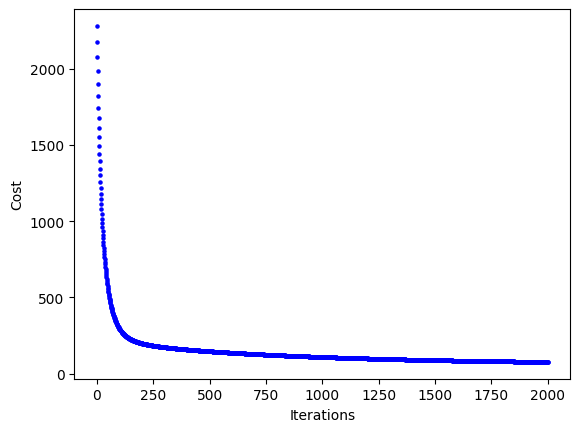

In [138]:
X, Theta, J_hist = fit(Y.values, R.values, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)
draw_cost_changes(J_hist)

In [139]:
predict = X@Theta
predict

array([[ 4.55466621,  1.95779596,  3.37639112,  2.89390287,  1.10798679,
         1.12001616,  2.89910432,  2.97256726, -0.18193118,  2.0767353 ,
         3.72131927,  3.77985258,  4.51465996,  1.14970212,  1.06855647],
       [ 2.83048968,  1.21418652,  2.24702225,  2.92047309,  1.20901798,
         2.97101307,  3.76413511,  1.45226792,  2.82476999,  2.71793354,
         2.21089532,  3.62769608,  0.45353515,  1.93501214,  2.83121922],
       [ 3.87132451,  1.97944739,  4.84718136,  2.68137531,  2.93285463,
         2.27985451,  4.76276005,  4.65647609,  2.94884678,  3.77690468,
         2.21181124,  3.82163444,  3.78046825,  2.81897672,  3.84486389],
       [ 4.63437624, -0.37166662,  3.94524284,  3.84917301,  2.04522667,
         3.86195074,  3.93916315,  2.2252839 ,  2.05277739,  1.91933562,
         2.91344521,  0.94742547,  0.57412508,  3.77375723,  4.66685835],
       [ 3.8879952 ,  0.42452634,  4.79195213,  4.80152718,  3.71846551,
         4.65401496,  4.00947814,  2.74434496, 

In [140]:
diff_train = np.array((predict-Y)*R)
# avoid those valueswhere R = 0 
diff_train_proivided = diff_train.ravel()[np.where(diff_train.ravel()!=0)]
print ('Training:', np.abs(diff_train_proivided).max(), np.abs(diff_train_proivided).mean())

Training: 0.6067517159723792 0.17942602110114758


(array([ 2.,  3.,  9., 14., 19., 19., 16., 16.,  6.,  6.]),
 array([-0.60675172, -0.51518577, -0.42361982, -0.33205388, -0.24048793,
        -0.14892199, -0.05735604,  0.0342099 ,  0.12577585,  0.21734179,
         0.30890774]),
 <BarContainer object of 10 artists>)

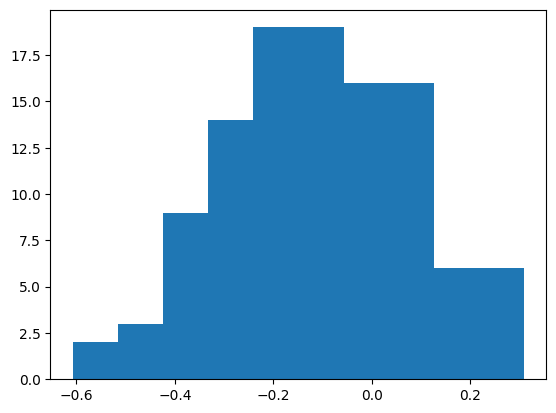

In [141]:
plt.hist(diff_train_proivided.ravel())

In [142]:
df_movie_names = pd.DataFrame(df_movie_names)
df_movie_names.shape

(9, 1)

In [143]:
def build_my_raitings():
    my_ratings = np.zeros((9, 1))

    my_ratings[0] = 4
    my_ratings[3] = 5
    my_ratings[4] = 4
    my_ratings[7]= 5
    return my_ratings

my_ratings= build_my_raitings()

print ('\n\nNew user ratings:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}\n'.format(int(my_ratings[i][0]),df_movie_names.iloc[i].values[0]))



New user ratings:

Rated 4 for Titanic

Rated 5 for 500 Days of Summer

Rated 4 for White Noise

Rated 5 for Pink Panther



In [144]:
def add_my_ratings(Y,R,my_ratings):
    Y = np.c_[my_ratings,Y]
    R = np.c_[my_ratings !=0 , R]
    return Y, R 
        
# Y,R= get_data()    
my_ratings= build_my_raitings()
Y, R = add_my_ratings(Y,R,my_ratings)
Y.shape,  R.shape

((9, 16), (9, 16))

Running gradient descent with alpha= 0.0005, lambda= 1, eps= 0.01, max_iter= 2000
50: 539.8572930903152
100: 298.3266612519029
150: 238.03862774817483
200: 214.3214038078071
250: 200.29682418078784
300: 189.9265650838453
350: 181.3739582053566
400: 173.92082075460382
450: 167.2310397104476
500: 161.12420559643002
550: 155.49194713989607
600: 150.2627387987246
650: 145.38561588770506
700: 140.82203446299349
750: 136.54150929862124
800: 132.51911270958013
850: 128.73394182469224
900: 125.16811935270283
950: 121.80610676523541
1000: 118.63421233755832
1050: 115.64022810845917
1100: 112.81315641971204
1150: 110.14300099938242
1200: 107.62060569052822
1250: 105.23752887819762
1300: 102.98594489505308
1350: 100.85856591804546
1400: 98.84857948015981
1450: 96.94959791626631
1500: 95.15561696062602
1550: 93.46098139294695
1600: 91.86035614391747
1650: 90.3487016594811
1700: 88.92125261578695
1750: 87.57349929680122
1800: 86.30117111170725
1850: 85.10022185302503
1900: 83.96681638917289
1950: 8

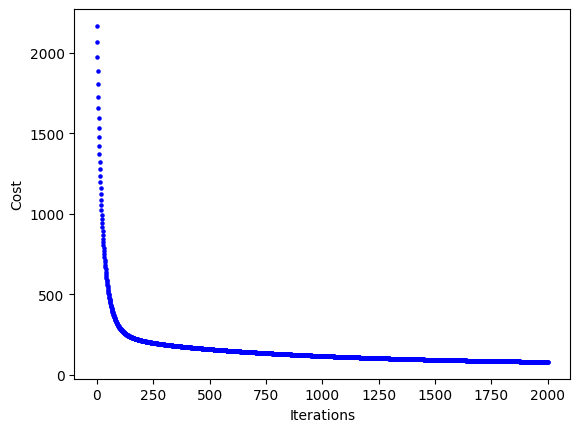

In [147]:
X, Theta, J_hist = fit(Y, R, num_features=20, alpha=0.0005, lambd=1, max_iter=2000,
                           eps=.01, step=50, verbose=1)
draw_cost_changes(J_hist)

In [152]:
pred= X @ Theta
my_pred = pred[:,0]
print(my_pred.shape)

top_pred= np.argsort(my_pred)[::-1]
print('\nTop recommendations for you:\n')
for i in range(5):
    j = top_pred[i]
    print('Predicting rating {:.2} for movie {}\n'.format(my_pred[j],df_movie_names.iloc[j]))

(9,)

Top recommendations for you:

Predicting rating 4.7 for movie Movie_names    500 Days of Summer
Name: 3, dtype: object

Predicting rating 4.7 for movie Movie_names    Pink Panther
Name: 7, dtype: object

Predicting rating 3.9 for movie Movie_names    White Noise
Name: 4, dtype: object

Predicting rating 3.7 for movie Movie_names    Titanic
Name: 0, dtype: object

Predicting rating 2.8 for movie Movie_names    Forest Gump
Name: 2, dtype: object

